In [2]:
import cv2 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from skimage import io
from skimage.color import rgb2gray
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using TensorFlow backend.


# DATA PROCESSING 

In [0]:
import zipfile
zip_ref =zipfile.ZipFile('/content/drive/My Drive/Vision/AsuMayo.zip','r')
zip_ref.extractall("/content/drive/My Drive/Vision/")
zip_ref.close()

In [0]:
#path_classes="/content/drive/My Drive/Vision/AsuMayo/AsuMayoTest/"
path_classes="/content/drive/My Drive/Vision/AsuMayo/AsuMayoTrain/"
classes_names = os.listdir(path_classes)
for i in range(len(classes_names)):
  nombre=classes_names[i]
  #os.makedirs("AsuMayo/AsuMayoTest/"+str(nombre[:-4]))
  os.makedirs("AsuMayo/AsuMayoTrain/"+str(nombre[:-4]))

In [0]:
for i in range(len(classes_names)):
  video=classes_names[i]
  #video_path = "/content/drive/My Drive/Vision/AsuMayo/AsuMayoTest/"+video
  video_path = "/content/drive/My Drive/Vision/AsuMayo/AsuMayoTrain/"+video
  cap = cv2.VideoCapture(video_path)
  frames,nombres = [],[]
  cont=1
  while(cap.isOpened()):
    ret,frame=cap.read()
    if not ret:
        break
    # append the frames to list
    frames.append(frame)
    if(cont<=9):
      nombres.append("frame-000"+str(cont))
    if(cont>=10 and cont <=99):
      nombres.append("frame-00"+str(cont))
    if(cont>=100 and cont <=999):
      nombres.append("frame-0"+str(cont))
    if(cont>=1000):
      nombres.append("frame-"+str(cont))
    cont+=1
  print(video[:-4])
  cont2=0
  for frame in frames:
    img = cv2.resize(frame, (500, 500)) 
    #cv2.imwrite("./AsuMayo/AsuMayoTest/"+video[:-4]+"/"+nombres[cont2]+".png", img)
    cv2.imwrite("./AsuMayo/AsuMayoTrain/"+video[:-4]+"/"+nombres[cont2]+".png", img)
    cont2+=1

In [0]:
img_test1 =io.imread('./AsuMayo/AsuMayoTrain/ShortVD_np_13/frame-0106.png')
descriptor_extractor = ORB(n_keypoints=200)
print img_test1.shape


descriptor_extractor.detect_and_extract(rgb2gray(img_test1))
keypoints1 = descriptor_extractor.keypoints

print keypoints1.shape

plt.imshow(img_test1); 
plt.scatter(keypoints1[:,1], keypoints1[:,0],c= "red",edgecolors="black", alpha=.6);
plt.imshow(img_test1);

# EXTRACT LABELS 

In [0]:
path_classes_train="./AsuMayo/AsuMayoTrain/"
path_classes_test="./AsuMayo/AsuMayoTest/"
classes_names_train = os.listdir(path_classes_train)
classes_names_test = os.listdir(path_classes_test)

array_imgsTr,array_imgsTe,x_train,x_test,y_train,y_test=[],[],[],[],[],[]
for i,name_class in enumerate(classes_names_train):    
    array_imgsTr=array_imgsTr+[name_class+"/"+s for s in os.listdir(path_classes_train+classes_names_train[i])]
imgs_train=np.array(array_imgsTr)

for i,name_class in enumerate(classes_names_test):    
    array_imgsTe=array_imgsTe+[name_class+"/"+s for s in os.listdir(path_classes_test+classes_names_test[i])]
imgs_test=np.array(array_imgsTe)

print ("ASU MAYO\n")
print("Videos Train: ",len(classes_names_train))
print("Videos Test: ",len(classes_names_test))

dic_classes_train = {}
for index, name in enumerate(classes_names_train):
    if(name[8:10]=="np"):
      dic_classes_train[name] = 0 #0 significa que no hay pólipo
    else: 
      dic_classes_train[name] = 1 #1 significa que si hay pólipo

dic_classes_test = {}
for index, name in enumerate(classes_names_test):
    if(name[-2:]=="np"):
      dic_classes_test[name] = 0 #0 significa que no hay pólipo
    else: 
      dic_classes_test[name] = 1 #1 significa que si hay pólipo

print("Etiquetas test: ",dic_classes_test) 
print("Etiquetas train: ",dic_classes_train) 
print("X_train: ", len(imgs_train), " X_test:",len(imgs_test), " Total: ", len(imgs_train)+len(imgs_test))

ASU MAYO

Videos Train:  20
Videos Test:  18
Etiquetas test:  {'testVD2_np': 0, 'testVD10_wp': 1, 'testVD12_wp': 1, 'testVD4_np': 0, 'testVD17_np': 0, 'testVD6_wp': 1, 'testVD8_wp': 1, 'testVD15_np': 0, 'testVD13_wp': 1, 'testVD5_wp': 1, 'testVD18_np': 0, 'testVD11_wp': 1, 'testVD3_np': 0, 'testVD14_np': 0, 'testVD1_np': 0, 'testVD9_wp': 1, 'testVD7_wp': 1, 'testVD16_np': 0}
Etiquetas train:  {'ShortVD_wp_49': 1, 'ShortVD_wp_24': 1, 'ShortVD_np_13': 0, 'ShortVD_np_5': 0, 'ShortVD_wp_66': 1, 'ShortVD_wp_2': 1, 'ShortVD_np_12': 0, 'ShortVD_np_14': 0, 'ShortVD_wp_70': 1, 'ShortVD_wp_68': 1, 'ShortVD_np_10': 0, 'ShortVD_np_7': 0, 'ShortVD_wp_4': 1, 'ShortVD_wp_52': 1, 'ShortVD_np_8': 0, 'ShortVD_wp_69': 1, 'ShortVD_np_9': 0, 'ShortVD_wp_61': 1, 'ShortVD_np_11': 0, 'ShortVD_np_6': 0}
X_train:  18902  X_test: 17574  Total:  36476


# **Extraer descriptor ORB**

In [0]:
import gc
path_classes_train="./AsuMayo/AsuMayoTrain/"

descriptor_extractor = ORB(n_keypoints=30)
arrayORB,y_train,ignoradas=[],[],0
imgs_train=sorted(imgs_train)
for i in range(len(imgs_train)):
    img_train =cv2.imread(path_classes_train+imgs_train[i],0)    
    etiquetaTrain=imgs_train[i]
    descriptor_extractor.detect_and_extract(rgb2gray(img_train))
    keypoints1 = descriptor_extractor.keypoints
    if(len(keypoints1)>=30):
      print(imgs_train[i],len(keypoints1))
      descriptorImage = descriptor_extractor.descriptors
      arrayORB.append(descriptorImage)
      y_train.append(dic_classes_train[etiquetaTrain[:-15]])  
    else: 
      ignoradas+=1
    gc.collect()
    
gc.collect() # explicitelly clean memory
arrayORB1=np.array(arrayORB)
array_ORB=np.concatenate(arrayORB1)
print("Imágenes ignoradas debido a pocos keypoints: ", ignoradas)
print (array_ORB.shape,30*len(imgs_train))


In [0]:
print ("Comprobando tamaño: ",array_ORB.shape,30*(len(imgs_train)-ignoradas))

Comprobando tamaño:  (473220, 256) 473220


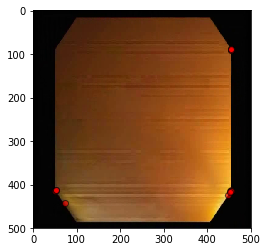

In [8]:
img_test1 =io.imread('./AsuMayo/AsuMayoTrain/ShortVD_np_13/frame-0103.png')
descriptor_extractor = ORB(n_keypoints=30)

descriptor_extractor.detect_and_extract(rgb2gray(img_test1))
keypoints1 = descriptor_extractor.keypoints

plt.imshow(img_test1); 
plt.scatter(keypoints1[:,1], keypoints1[:,0],c= "red",edgecolors="black", alpha=.6);
plt.imshow(img_test1);

# **BUILD HISTOGRAM AND KMEANS** 

In [0]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [0]:
from sklearn.cluster import KMeans
v_words =70

kmeans = KMeans(n_clusters=v_words) 
kmeans.fit(array_ORB)
visual_dictionary=kmeans.cluster_centers_
print (visual_dictionary.shape)

(70, 256)


# EXTRACT TRAINING AND TEST DATA

In [0]:
import gc

arr_h_test,arr_h_train=[],[]

#array_ORB es de train
#path_classes = '/content/drive/My Drive/image_set/'
path_classes = '/content/drive/My Drive/data/'
descriptor_extractor = ORB(n_keypoints=30)

for i in range(len(arrayORB)): 
    histo = build_histogram(arrayORB[i], kmeans)
    arr_h_train.append(histo)

#array ORB de test
descriptor_extractorTest = ORB(n_keypoints=30)
arrayORB_t,y_test=[],[]
    
for i in range(len(imgs_test)):
    img_test =cv2.imread(path_classes_test+imgs_test[i])
    etiquetaTest=imgs_test[i]
    descriptor_extractor.detect_and_extract(rgb2gray(img_test))
    keypoints1 = descriptor_extractor.keypoints
    if(len(keypoints1)>=30):
      print(imgs_test[i],len(keypoints1))
      descriptorImage = descriptor_extractor.descriptors
      arrayORB_t.append(descriptorImage)
      y_test.append(dic_classes_test[etiquetaTest[:-15]])

for i in range(len(arrayORB_t)): 
    histo1 = build_histogram(arrayORB_t[i], kmeans)
    arr_h_test.append(histo1)

arr_h_train=np.array(arr_h_train)
arr_h_test=np.array(arr_h_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

print (arr_h_test.shape, arr_h_train.shape, y_train.shape, y_test.shape)

# **CLASSIFIERS**

In [0]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

**KNN**


10 0.6914225149519267
20 0.7015671133318192
30 0.7083049435990613
40 0.7123930653342418
50 0.7130744189567719
60 0.7124687712923007
70 0.7120902415020062
80 0.7132258308728897
90 0.7136800666212431
100 0.7134529487470664


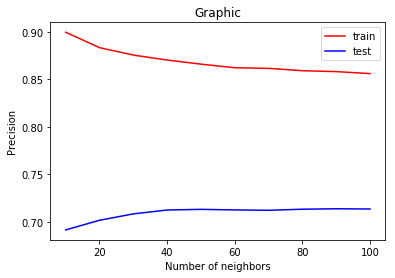

In [0]:
accuracy_KNN,accuracy_KNN_train=[],[]
x=[i for i in range(10,110,10)]
for i in range(10,110,10):
  KN_est = KNeighborsClassifier(n_neighbors=i)
  KN_est.fit(arr_h_train, y_train)
  KN_pr = KN_est.predict(arr_h_test)
  accuracy_KNN_train.append(KN_est.score(arr_h_train, y_train))
  accuracy_KNN.append(KN_est.score(arr_h_test, y_test))
  print (i,KN_est.score(arr_h_test, y_test))

#results
plt.plot(x, accuracy_KNN_train, color='r', label='train')
plt.plot(x, accuracy_KNN, color='b', label='test')
plt.title('Graphic')
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Number of neighbors')
plt.show()

0.7136800666212431


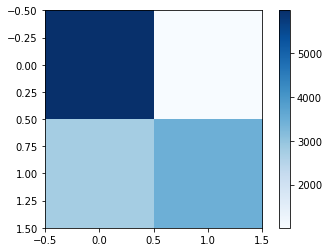

In [0]:
KN_est = KNeighborsClassifier(n_neighbors=90)
KN_est.fit(arr_h_train, y_train)
KN_pr = KN_est.predict(arr_h_test)
print (KN_est.score(arr_h_test, y_test))
cm_test = confusion_matrix(y_test, KN_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

**NAIVE GAUSSIAN**

0.6505412976001211


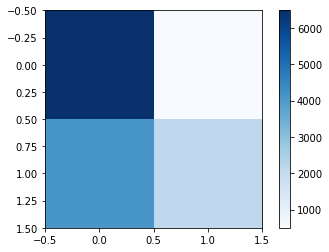

In [0]:
# With Naive Gaussian Classifier
accuracy_GN=[]
GN_est = GaussianNB()
GN_est.fit(arr_h_train, y_train)
GN_pr = GN_est.predict(arr_h_test)
print (GN_est.score(arr_h_test, y_test))
cm_test = confusion_matrix(y_test, GN_pr)
accuracy_GN.append(GN_est.score(arr_h_test, y_test))
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

**RANDOM FOREST**

10 0.6508441214323567
20 0.6690135513664925
30 0.664168370050723
40 0.6631841925959573
50 0.6706790824437884
60 0.6703762586115527
70 0.6703762586115527
80 0.6712847301082595
90 0.6668937845408434
100 0.6672723143311379


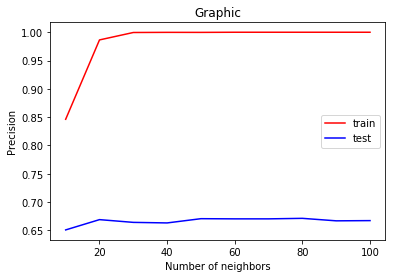

In [0]:
# With Random Forest
accuracy_RF,accuracy_RF_train=[],[]
for i in range(10,110,10):
  RF_est = RandomForestClassifier(n_estimators=i,criterion='entropy', max_depth=i)
  RF_est.fit(arr_h_train, y_train)
  RF_pr = RF_est.predict(arr_h_test)
  accuracy_RF.append(RF_est.score(arr_h_test, y_test))
  accuracy_RF_train.append(RF_est.score(arr_h_train, y_train))
  print(i, RF_est.score(arr_h_test, y_test))
  
#results
plt.plot(x, accuracy_RF_train, color='r', label='train')
plt.plot(x, accuracy_RF, color='b', label='test')
plt.title('Graphic')
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Number of neighbors')
plt.show()

0.6673480202891967


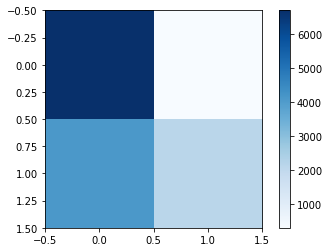

In [0]:
# With Random Forest
RF_est = RandomForestClassifier(n_estimators=80,criterion='entropy',max_depth=80)
RF_est.fit(arr_h_train, y_train)
RF_pr = RF_est.predict(arr_h_test)
print( RF_est.score(arr_h_test, y_test))
cm_test = confusion_matrix(y_test, RF_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

**SVM**

rbf 0.6958891664774017
linear 0.6774169127110303
poly 0.6938451056098115
sigmoid 0.5995911878264819


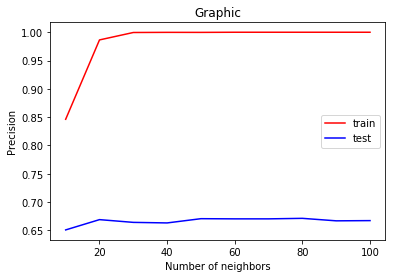

In [0]:
# With Support vector Machine
accuracy_SVM,accuracy_SVM_train=[],[]
kernel=['rbf','linear','poly','sigmoid']
for i in kernel:
  SV_est = SVC(kernel=i,gamma='scale')
  SV_est.fit(arr_h_train, y_train)
  SV_pr = SV_est.predict(arr_h_test)
  accuracy_SVM_train.append(SV_est.score(arr_h_train, y_train))
  accuracy_SVM.append(SV_est.score(arr_h_test, y_test))
  print (i,SV_est.score(arr_h_test, y_test))

#results
plt.plot(x, accuracy_RF_train, color='r', label='train')
plt.plot(x, accuracy_RF, color='b', label='test')
plt.title('Graphic')
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Number of neighbors')
plt.show()

0.6958891664774017


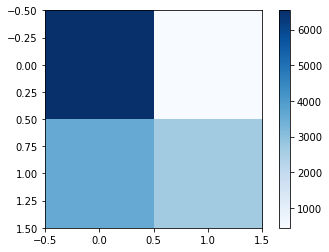

In [0]:
# With Support vector Machine
SV_est = SVC(kernel='rbf',gamma='scale')
SV_est.fit(arr_h_train, y_train)
SV_pr = SV_est.predict(arr_h_test)
print (SV_est.score(arr_h_test, y_test))
cm_test = confusion_matrix(y_test, SV_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

**The best classifier**

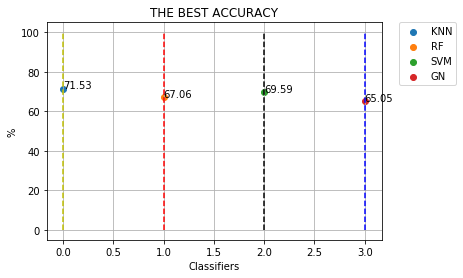

In [0]:
classi=['KNN','RF','SVM', 'GB']
acc=[np.round(np.max(accuracy_KNN)*100,2),np.round(np.max(accuracy_RF)*100,2),np.round(np.max(accuracy_SVM)*100,2), 
    np.round(np.max(accuracy_GN)*100,2)]
x=[i for i in range(len(classi))]
for i, txt in enumerate(acc):
    plt.annotate(txt, (x[i], acc[i]))
    
plt.scatter(0, np.max(accuracy_KNN)*100)
plt.scatter(1,  np.max(accuracy_RF)*100)
plt.scatter(2,  np.max(accuracy_SVM)*100)
plt.scatter(3,  np.max(accuracy_GN)*100)
plt.title("THE BEST ACCURACY"), plt.ylabel("%"),plt.xlabel("Classifiers")
plt.vlines(0, 0, 100,colors="y", linestyles="dashed")
plt.vlines(1, 0, 100,colors="r", linestyles="dashed")
plt.vlines(2, 0, 100,colors="black", linestyles="dashed")
plt.vlines(3, 0, 100,colors="blue", linestyles="dashed")
plt.grid()
plt.legend(("KNN","RF","SVM","GN"),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()